In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

/home/p3rzival/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('summary/summarized_data.csv', index_col=['ViT Name'])
df["Accuracy"] = df["Accuracy"]/100
df

,Accuracy,Max Mem use,Mem Latency,Inference Latency,Total Latency
ViT Name,,,,,
ViT-Combine-Merging10-Quantized,0.9472,183.556152,0.207412,5.681480,5.888892
ViT-Combine-Merging15-Quantized,0.9439,183.343262,0.206288,5.730487,5.936775
ViT-Combine-Merging20-Quantized,0.9244,183.299316,0.203310,5.713740,5.917050
ViT-Combine-Merging25-Quantized,0.9005,183.255371,0.201542,5.659542,5.861084
ViT-Combine-Merging30-Quantized,0.8819,183.023438,0.205965,5.519878,5.725843
...,...,...,...,...,...
ViT-Prunning-50,0.9283,234.905762,0.237781,6.111771,6.349552
ViT-Prunning-60,0.9350,214.862793,0.233998,5.689189,5.923187
ViT-Prunning-70,0.9201,192.833496,0.234496,5.317981,5.552477


In [3]:
original_acc = df.filter(regex="ViT-Defa*", axis=0)["Accuracy"].item()
original_time = df.filter(regex="ViT-Defa*", axis=0)["Total Latency"].item()
original_mem = df.filter(regex="ViT-Defa*", axis=0)["Max Mem use"].item()

In [4]:
prun = df.loc[df.index == "ViT-Prunning-60"]
merg = df.loc[df.index == "ViT-Merging10"]
prunQ = df.loc[df.index == "ViT-Combine-Pruning0.4-Quantized"]
mergQ = df.loc[df.index == "ViT-Combine-Merging5-Quantized"]
prunMerg = df.loc[df.index == "ViT-Combine-Pruning0.6-Merging10"]
prunMergQ = df.loc[df.index == "ViT-Combine-Pruning0.4-Merging5-Quantized"]

names = ["Pruning 60%", "Merging r = 10", "Pruning 40% + Quant", "Merging r = 5 + Quant", "Pruning 60% + Merging r = 10", "Pruning 40% + Merging r = 5 + Quant"]

In [5]:
combined = pd.concat([prun, merg, prunQ, mergQ, prunMerg, prunMergQ])

In [ ]:
offset = 0
diff_latency = original_time - combined["Total Latency"]
diff_mem = original_mem - combined["Max Mem use"]
diff_acc = original_acc - combined["Accuracy"]

tradeoff_latency = (diff_latency/original_time)/(diff_acc/original_acc + offset) * (combined["Accuracy"]**2)
tradeoff_mem = (diff_mem/original_mem)/(diff_acc/original_acc + offset) * (combined["Accuracy"]**2)

combined["Values time"] = tradeoff_latency
combined["Values mem"] = tradeoff_mem

In [7]:
combined

,Accuracy,Max Mem use,Mem Latency,Inference Latency,Total Latency,Values time,Values mem
ViT Name,,,,,,,
ViT-Prunning-60,0.9350,214.862793,0.233998,5.689189,5.923187,0.229884,0.323462
ViT-Merging10,0.9472,344.372559,0.243071,7.013835,7.256906,0.091178,-0.000722
ViT-Combine-Pruning0.4-Quantized,0.9384,134.302246,0.205213,2.664623,2.869837,0.561375,0.530799
ViT-Combine-Merging5-Quantized,0.9491,183.242188,0.202321,5.611656,5.813977,0.252560,0.421001
ViT-Combine-Pruning0.6-Merging10,0.9336,217.970703,0.227545,5.703994,5.931539,0.227977,0.314281
ViT-Combine-Pruning0.4-Merging5-Quantized,0.9368,134.226074,0.207586,5.825988,6.033574,0.219368,0.528302


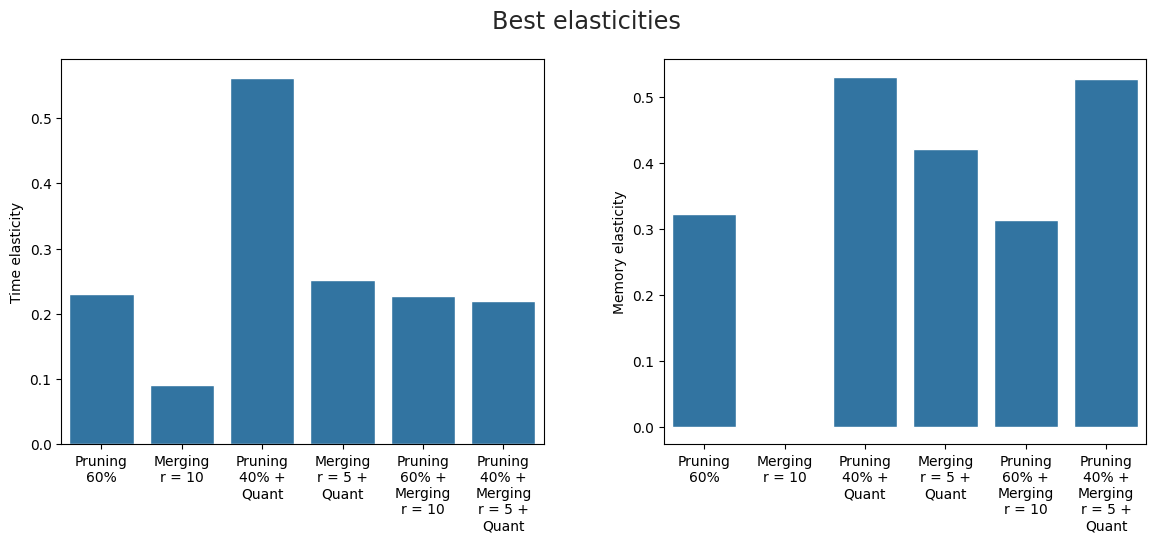

In [8]:
import textwrap
fig, axes = plt.subplots(1,2, figsize=(14, 5))
fig.subplots_adjust(wspace=0.25)
sns.set(font_scale=1.2)
sns.barplot(x=[textwrap.fill(e, 7) for e in names], y=combined["Values time"], ax=axes[0])
axes[0].set_ylabel("Time elasticity")
axes[1].set_ylabel("Memory elasticity")
#plt.xticks(rotation=90)
#axes[0].set_ylim(0, 100)
#axes[1].set_ylim(0, 100)
sns.barplot(x=[textwrap.fill(e, 7) for e in names], y=combined["Values mem"], ax=axes[1])
fig.suptitle("Best elasticities")
plt.savefig("summary/globalGraphs/allBarsProva.png",bbox_inches='tight')